# Plot the MSD vs time

In [35]:
# import the libraries

import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt


In [36]:
# load the trajectories and check all the files for MSD calculation

# load the trajectory of step5_1 of production
traj_step5_1=md.load('step5_1.xtc',top='step5_1.gro')

# load the Concatenated trajectory of step5_1 to step5_9 of production
traj_con=md.load('step5_all@1.xtc',top='step5_1.gro')

# load the unwrapped concatenated_trajectory of step5_1 to step5_9 of production
traj=md.load('step5_all_unwrap@1.xtc',top='step5_unwrap.gro')


# check if they were correctly generated: 
print("trajectory checking: \n",traj_step5_1, "\n", traj_con, "\n", traj, "\n")
print("time(ns) checking: \n",traj_step5_1.time[-1]/1000, traj_con.time[-1]/1000 ,traj.time[-1]/1000, "\n")
#print(traj.n_frames)
print("topology checking: \n", traj_step5_1.topology, "\n", traj_con.topology, "\n", traj.topology)

trajectory checking: 
 <mdtraj.Trajectory with 101 frames, 11645 atoms, 3891 residues, and unitcells> 
 <mdtraj.Trajectory with 901 frames, 11645 atoms, 3891 residues, and unitcells> 
 <mdtraj.Trajectory with 901 frames, 11645 atoms, 3891 residues, and unitcells> 

time(ns) checking: 
 1.0 9.0 9.0 

topology checking: 
 <mdtraj.Topology with 1 chains, 3891 residues, 11645 atoms, 7754 bonds> 
 <mdtraj.Topology with 1 chains, 3891 residues, 11645 atoms, 7754 bonds> 
 <mdtraj.Topology with 1 chains, 3891 residues, 11645 atoms, 7754 bonds>


In [37]:
# load the MSD files generated by GROMAX from the upper traj files
time_Cl, MSD_Cl = np.loadtxt('./Cl.xvg', skiprows=20, unpack=True)
time_O, MSD_O = np.loadtxt('./Oxy.xvg', skiprows=20, unpack=True)
time_Na, MSD_Na = np.loadtxt('./Na.xvg', skiprows=20, unpack=True)


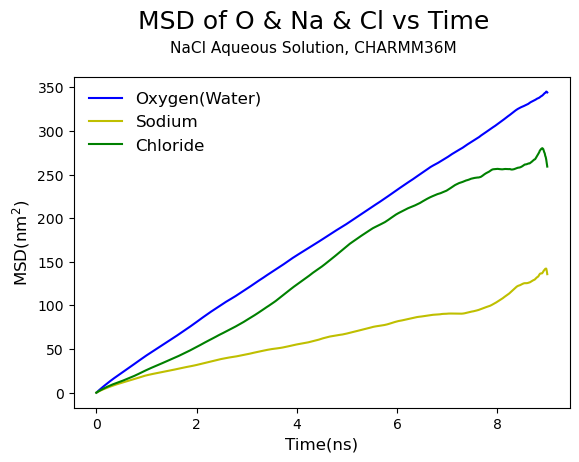

In [39]:
# plot the MSD of water oxygen atoms, sodium ions and chloride ions colorblind-friendly 
fig=plt.figure(1)
plt.plot(time_O/1000,MSD_O,color='b')
plt.plot(time_Na/1000,MSD_Na,color='y')
plt.plot(time_Cl/1000,MSD_Cl,color='g')
# set the axis labels
plt.xlabel('Time(ns)',fontsize=12)
plt.ylabel('MSD(nm$^2$)',fontsize=12)
# set the title
plt.text(x=0.5, y=0.9, s="MSD of O & Na & Cl vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.85, s= "NaCl Aqueous Solution, CHARMM36M", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# add a legend
plt.legend(['Oxygen(Water)','Sodium','Chloride'],fontsize=12,frameon=False)
# save figure as pdf in ../Figures
fname = '../Figures/NaCl_Aq_MSD.pdf'